In [4]:
import pandas as pd
csvfile="/content/evals.csv"
df=pd.read_csv(csvfile,encoding='utf-8')

df

,course_id,prof_id,score,rank,ethnicity,gender,language,age,cls_perc_eval,cls_did_eval,...,cls_credits,bty_f1lower,bty_f1upper,bty_f2upper,bty_m1lower,bty_m1upper,bty_m2upper,bty_avg,pic_outfit,pic_color
0,1,1,4.7,tenure track,minority,female,english,36,55.81395,24,...,multi credit,5,7,6,2,4,6,5.000,not formal,color
1,2,1,4.1,tenure track,minority,female,english,36,68.80000,86,...,multi credit,5,7,6,2,4,6,5.000,not formal,color
2,3,1,3.9,tenure track,minority,female,english,36,60.80000,76,...,multi credit,5,7,6,2,4,6,5.000,not formal,color
3,4,1,4.8,tenure track,minority,female,english,36,62.60163,77,...,multi credit,5,7,6,2,4,6,5.000,not formal,color
4,5,2,4.6,tenured,not minority,male,english,59,85.00000,17,...,multi credit,4,4,2,2,3,3,3.000,not formal,color
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,459,93,4.5,tenure track,not minority,male,english,32,60.46511,52,...,multi credit,6,6,9,7,8,5,6.833,not formal,color
459,460,94,3.5,tenure track,minority,female,non-english,42,57.14286,48,...,multi credit,3,8,7,4,6,4,5.333,not formal,color
460,461,94,4.4,tenure track,minority,female,non-english,42,77.61194,52,...,multi credit,3,8,7,4,6,4,5.333,not formal,color
461,462,94,4.4,tenure track,minority,female,non-english,42,81.81818,54,...,multi credit,3,8,7,4,6,4,5.333,not formal,color


In [5]:
df["bty_avg"]

0      5.000
1      5.000
2      5.000
3      5.000
4      3.000
       ...  
458    6.833
459    5.333
460    5.333
461    5.333
462    5.333
Name: bty_avg, Length: 463, dtype: float64

In [6]:
df.head()



,course_id,prof_id,score,rank,ethnicity,gender,language,age,cls_perc_eval,cls_did_eval,...,cls_credits,bty_f1lower,bty_f1upper,bty_f2upper,bty_m1lower,bty_m1upper,bty_m2upper,bty_avg,pic_outfit,pic_color
0,1,1,4.7,tenure track,minority,female,english,36,55.81395,24,...,multi credit,5,7,6,2,4,6,5.0,not formal,color
1,2,1,4.1,tenure track,minority,female,english,36,68.80000,86,...,multi credit,5,7,6,2,4,6,5.0,not formal,color
2,3,1,3.9,tenure track,minority,female,english,36,60.80000,76,...,multi credit,5,7,6,2,4,6,5.0,not formal,color
3,4,1,4.8,tenure track,minority,female,english,36,62.60163,77,...,multi credit,5,7,6,2,4,6,5.0,not formal,color
4,5,2,4.6,tenured,not minority,male,english,59,85.00000,17,...,multi credit,4,4,2,2,3,3,3.0,not formal,color


# ***1. a Histogram of score given to professsors by students***


Text(0, 0.5, 'Frequency')

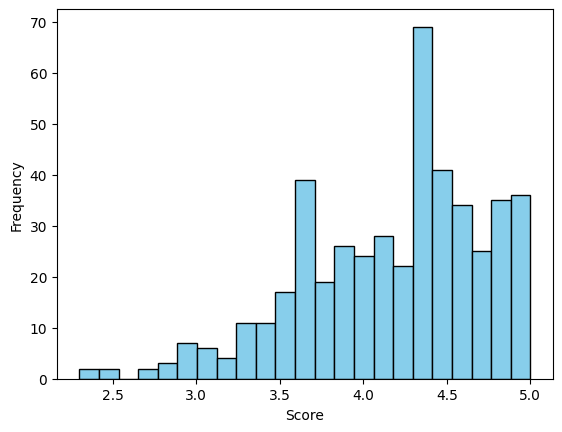

In [7]:
import matplotlib.pyplot as plt
scores=df[["score"]]
plt.hist(scores, bins=23, color='skyblue', edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Frequency')

**1.b Most students,about 70, have given the score around 4.3**

# **2.a.Data analysis of score andavg beauty values**

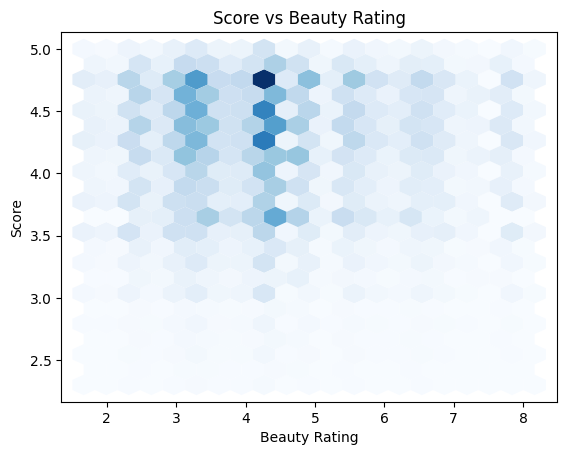

In [8]:
beauty_ratings=df["bty_avg"]
plt.hexbin(beauty_ratings, scores, gridsize=20, cmap='Blues', edgecolors='none')

plt.xlabel('Beauty Rating')
plt.ylabel('Score')
plt.title('Score vs Beauty Rating')
plt.show()

**2.b The given inference was right. As the average increases, the score increases.**

# ***3.Fitting linear regression model***

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
x=df[["score"]]
y=df["bty_avg"]
model = LinearRegression()
model.fit(x, y)


LinearRegression()

In [10]:
intercept = model.intercept_
slope = model.coef_[0]
print("Intercept:", intercept)
print("Slope:", slope)


Intercept: 2.2237420698216037
Slope: 0.5255675004773122


4.a. It is an increasing slope.. So,beauty average is directly proportional to score given by students.

In [14]:
import statsmodels.api as sm
X = sm.add_constant(df[['bty_avg']])
y = df['score']
model = sm.OLS(y, X).fit()
p_values = model.pvalues
# Print p-values
print(p_values)

const      1.561043e-191
bty_avg     5.082731e-05
dtype: float64


## ***4.b As, the p-value is very small, the bty-avg is statistically significant.***

# ***6.a Correlation check between bty_avg and bty_f1upper***

In [17]:
correlation = df['bty_avg'].corr(df['bty_f1upper'])
print("correlation coefficient:", correlation)

correlation coefficient: 0.8437283710770256


**6.b bty_avg is higly correlated to bty_f1upper as it has correlation coefficient of 0.844, which is close to one, inferring strong correlativity.**

***7.a.Correlation of the variables  ['bty_f1lower', 'bty_f1upper', 'bty_f2upper', 'bty_m1lower', 'bty_m1upper', 'bty_m2upper', 'bty_avg']***

In [18]:
attributes = ['bty_f1lower', 'bty_f1upper', 'bty_f2upper', 'bty_m1lower', 'bty_m1upper', 'bty_m2upper', 'bty_avg']
correlation_matrix = df[attributes].corr()
print(correlation_matrix)

             bty_f1lower  bty_f1upper  bty_f2upper  bty_m1lower  bty_m1upper  \
bty_f1lower     1.000000     0.619392     0.641927     0.612426     0.676695   
bty_f1upper     0.619392     1.000000     0.648152     0.598928     0.690617   
bty_f2upper     0.641927     0.648152     1.000000     0.535983     0.649640   
bty_m1lower     0.612426     0.598928     0.535983     1.000000     0.595085   
bty_m1upper     0.676695     0.690617     0.649640     0.595085     1.000000   
bty_m2upper     0.593766     0.565576     0.513062     0.540893     0.586506   
bty_avg         0.843911     0.843728     0.821850     0.778351     0.864640   

             bty_m2upper   bty_avg  
bty_f1lower     0.593766  0.843911  
bty_f1upper     0.565576  0.843728  
bty_f2upper     0.513062  0.821850  
bty_m1lower     0.540893  0.778351  
bty_m1upper     0.586506  0.864640  
bty_m2upper     1.000000  0.757346  
bty_avg         0.757346  1.000000  


***7.b It is clearly seen that bty_avg is Highly correlated with most of the variables as its correlation coefficients with others are closer to 1 than that of other variablles aming themselves.***

# ***8.Multilinear Model for the given variables after removing bty_avg***

In [21]:
df.drop('bty_avg', axis=1)

X1= df[['bty_f1lower', 'bty_f1upper', 'bty_f2upper', 'bty_m1lower', 'bty_m1upper', 'bty_m2upper']]
y1 = df['score']
X1 = sm.add_constant(X1)
model1 = sm.OLS(y1, X1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     4.053
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           0.000569
Time:                        16:15:18   Log-Likelihood:                -362.45
No. Observations:                 463   AIC:                             738.9
Df Residuals:                     456   BIC:                             767.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.8793      0.087     44.486      

# ***9.MODEL:***
# score=(bty_f1lower * 0.0012)+(bty_f1upper * 0.0449)+(bty_f2upper * 0.0119)-(bty_m1lower * 0.0326)+(bty_m1upper * 0.0251)+(bty_m2upper * 0.0022)+ 3.8793

10. Standaard errors:
const                 0.087     
bty_f1lower           0.021     
bty_f1upper           0.020     
bty_f2upper           0.018     
bty_m1lower           0.021     
bty_m1upper           0.019      
bty_m2upper           0.021      

The standard error is quite low for all the variables here the change in output from true value is very low and the output is much closer to the accurate value.

In [28]:
from sklearn.model_selection import train_test_split
X2 = df[['bty_f1lower', 'bty_f1upper', 'bty_f2upper', 'bty_m1lower', 'bty_m1upper', 'bty_m2upper']]  # Input features
y2 = df['score']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)
model2 = LinearRegression()
model2.fit(X2_train, y2_train)
new_data=[[5,7,6,2,4,6]]
predictions = model2.predict(new_data)
print("Predicted values:", predictions)

Predicted values: [4.3607755]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [30]:
actual_value=4.7
MSE=((4.7-4.3)**2)
MSE

0.16000000000000028

11.
Mean Squared Error:0.1600000000000028
R^2: 0.051 (as received from Q8)

--> These values infer that the data is does not fit well into the model and the model would make less accurate predictions.   